In [1]:
#Importing Libraries
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer;

#Wisconsin Breast Cancer Dataset
cancer = load_breast_cancer();
X = cancer.data;
y = cancer.target;

In [2]:
#Converting it into a pandas dataframe
cancer_df=pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [3]:
cancer_df.sample(5)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
371        15.19         13.21           97.65      711.8          0.07963   
160        11.75         20.18           76.10      419.8          0.10890   
372        21.37         15.10          141.30     1386.0          0.10010   
251        11.50         18.45           73.28      407.4          0.09345   
339        23.51         24.27          155.10     1747.0          0.10690   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
371           0.06934         0.03393              0.02657         0.1721   
160           0.11410         0.06843              0.03738         0.1993   
372           0.15150         0.19320              0.12550         0.1973   
251           0.05991         0.02638              0.02069         0.1834   
339           0.12830         0.23080              0.14100         0.1797   

     mean fractal dimension  ...  worst radius  worst texture  \
371                 0.05544  ...         16.20          15.73   
160                 0.06453  ...         13.32          26.21   
372                 0.06183  ...         22.69          21.84   
251                 0.05934  ...         12.97          22.46   
339                 0.05506  ...         30.67          30.73   

     worst perimeter  worst area  worst smoothness  worst compactness  \
371           104.50       819.1            0.1126             0.1737   
160            88.91       543.9            0.1358             0.1892   
372           152.10      1535.0            0.1192             0.2840   
251            83.12       508.9            0.1183             0.1049   
339           202.40      2906.0            0.1515             0.2678   

     worst concavity  worst concave points  worst symmetry  \
371          0.13620               0.08178          0.2487   
160          0.19560               0.07909          0.3168   
372          0.40240               0.19660          0.2730   
251          0.08105               0.06544          0.2740   
339          0.48190               0.20890          0.2593   

     worst fractal dimension  
371                  0.06766  
160                  0.07987  
372                  0.08666  
251                  0.06487  
339                  0.07738  

[5 rows x 30 columns]

In [4]:
#Adding column 'target'
cancer_df['Target'] = y

In [6]:
#Assigning Tumor name to target values
y = np.where(y=='0', 'Malignant', y)
y = np.where(y=='1', 'Benign', y)

In [7]:
#Data with tumor information
data_with_tumor = cancer_df.copy()
data_with_tumor["Target name"] = y
print(data_with_tumor.sample(5))

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
81        13.340         15.86           86.49      520.0          0.10780   
523       13.710         18.68           88.73      571.0          0.09916   
285       12.580         18.40           79.83      489.0          0.08393   
35        16.740         21.59          110.10      869.5          0.09610   
520        9.295         13.90           59.96      257.8          0.13710   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
81            0.15350         0.11690             0.069870         0.1942   
523           0.10700         0.05385             0.037830         0.1714   
285           0.04216         0.00186             0.002924         0.1697   
35            0.13360         0.13480             0.060180         0.1896   
520           0.12250         0.03332             0.024210         0.2197   

     mean fractal dimension  ...  worst perimeter  worst area  \
81 

In [8]:
#Statistical Information about our dataset
data_with_tumor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
#Splitting our data into test and train
from sklearn.model_selection import train_test_split;

X_train , X_test, y_train, y_test = train_test_split(X,
                                                     y,
                                                     test_size = 0.2,
                                                     random_state = 0);

print(X_train.shape);
print(y_train.shape);
print("\r\n");
print(X_test.shape);
print(y_test.shape);

(455, 30)
(455,)


(114, 30)
(114,)


# Decision Tree Classifier

In [10]:
#Information Gain on decision tree
from sklearn.tree import DecisionTreeClassifier;

tree = DecisionTreeClassifier(criterion    =  'entropy',
                              max_depth    =  3,
                              random_state =  0 );
tree_model=tree.fit(X_train, y_train)

[Text(193.15384615384616, 190.26, 'worst concave points <= 0.142\nentropy = 0.945\nsamples = 455\nvalue = [290, 165]'),
 Text(103.01538461538462, 135.9, 'worst perimeter <= 107.75\nentropy = 0.399\nsamples = 303\nvalue = [279, 24]'),
 Text(51.50769230769231, 81.53999999999999, 'symmetry error <= 0.016\nentropy = 0.133\nsamples = 269\nvalue = [264, 5]'),
 Text(25.753846153846155, 27.180000000000007, 'entropy = 0.337\nsamples = 80\nvalue = [75, 5]'),
 Text(77.26153846153846, 27.180000000000007, 'entropy = 0.0\nsamples = 189\nvalue = [189, 0]'),
 Text(154.52307692307693, 81.53999999999999, 'worst texture <= 20.22\nentropy = 0.99\nsamples = 34\nvalue = [15, 19]'),
 Text(128.76923076923077, 27.180000000000007, 'entropy = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(180.27692307692308, 27.180000000000007, 'entropy = 0.667\nsamples = 23\nvalue = [4, 19]'),
 Text(283.2923076923077, 135.9, 'worst perimeter <= 112.8\nentropy = 0.375\nsamples = 152\nvalue = [11, 141]'),
 Text(257.53846153846155, 8

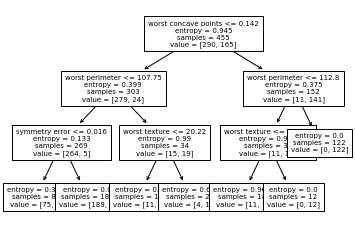

In [11]:
#Plot the tree
from sklearn.tree import plot_tree;

plot_tree(tree,
          feature_names = cancer.feature_names,
          fontsize      = 7 )

### Performance Measures For Decision Tree Classifier

In [12]:
#Accuracy Score
from sklearn.metrics import accuracy_score;
y_pred_train = tree.predict(X_train);
print("Train Set Accuracy : ", accuracy_score(y_train, y_pred_train))
y_pred_test = tree.predict(X_test);
print("Test Set Accuracy  : ", accuracy_score(y_test, y_pred_test))

Train Set Accuracy :  0.9648351648351648
Test Set Accuracy  :  0.9473684210526315


In [13]:
#Prediction
Test_point = [[17.99, 10.38, 122.80, 1001.0, 0.11840,0.27760, 0.3001, 0.14710
               
,0.2419,0.07871,1.095
,0.9053
,8.589
,153.4
,0.006399
,0.04904
,0.05373
,0.01587
,0.03003
,0.006193
,25.38
,17.33
,184.60, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.11890]]

print(tree.predict(Test_point))

['Malignant']


In [17]:
#Classification Report
import sklearn
print("Training metrics:")
print(sklearn.metrics.classification_report(y_true= y_train, y_pred= y_pred_train))
    
# test data metrics
print("Test data metrics:")
print(sklearn.metrics.classification_report(y_true= y_test, y_pred= y_pred_test))

score=tree.score(X_test, y_pred_test)
print("score=", score)

Training metrics:
              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97       290
   Malignant       0.97      0.93      0.95       165

    accuracy                           0.96       455
   macro avg       0.97      0.96      0.96       455
weighted avg       0.97      0.96      0.96       455

Test data metrics:
              precision    recall  f1-score   support

      Benign       0.98      0.93      0.95        67
   Malignant       0.90      0.98      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

score= 1.0


# Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rf = RandomForestClassifier()

rf.fit(X_train,y_train)

# Predictions on training and validation
y_pred_trainrf = rf.predict(X_train)

# predictions for test
y_pred_testrf = rf.predict(X_test)

#train metrics
print("Training metrics:")
print(sklearn.metrics.classification_report(y_true= y_train, y_pred= y_pred_trainrf))
    
#test metrics
print("Test data metrics:")
print(sklearn.metrics.classification_report(y_true= y_test, y_pred= y_pred_testrf))

print("Train Set Accuracy : ", accuracy_score(y_train, y_pred_trainrf))
print("Test Set Accuracy : ", accuracy_score(y_test, y_pred_testrf))

score_rf=rf.score(X_test, y_pred_testrf)

print("score=",score)


Training metrics:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00       290
   Malignant       1.00      1.00      1.00       165

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

Test data metrics:
              precision    recall  f1-score   support

      Benign       0.97      0.96      0.96        67
   Malignant       0.94      0.96      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Train Set Accuracy :  1.0
Test Set Accuracy :  0.956140350877193
score= 1.0


In [33]:
Test_point = [[17.99, 10.38, 122.80, 1001.0, 0.11840,0.27760  ,  0.3001 ,   0.14710 ,0.2419,0.07871,1.095
,0.9053
,8.589
,153.4
,0.006399
,0.04904
,0.05373
,0.01587
,0.03003
,0.006193
,25.38
,17.33
,184.60, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.11890]]

print(rf.predict(Test_point))

['Malignant']


# K-Nearest Neighbor Classifier

In [22]:
#New KNN model
from sklearn.neighbors import KNeighborsClassifier

#Just putting 5 for now
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
#Feature metrics
y_pred_trainknn = knn.predict(X_train)

# predictions for test
y_pred_testknn = knn.predict(X_test)

# train metrics
print("Training metrics:")
print(sklearn.metrics.classification_report(y_true= y_train, y_pred= y_pred_trainknn))
    
# test metrics
print("Test data metrics:")
print(sklearn.metrics.classification_report(y_true= y_test, y_pred= y_pred_testknn))

print("Train Set Accuracy : ", accuracy_score(y_train, y_pred_trainknn))
print("Test Set Accuracy : ", accuracy_score(y_test, y_pred_testknn))

score_knn=knn.score(X_test, y_pred_testknn)
print("Score= ",score_knn)

Training metrics:
              precision    recall  f1-score   support

      Benign       0.95      0.98      0.96       290
   Malignant       0.96      0.90      0.93       165

    accuracy                           0.95       455
   macro avg       0.95      0.94      0.94       455
weighted avg       0.95      0.95      0.95       455

Test data metrics:
              precision    recall  f1-score   support

      Benign       0.95      0.94      0.95        67
   Malignant       0.92      0.94      0.93        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

Train Set Accuracy :  0.9494505494505494
Test Set Accuracy :  0.9385964912280702
Score=  1.0


In [34]:
Test_point = [[17.99, 10.38, 122.80, 1001.0, 0.11840,0.27760  ,  0.3001 ,   0.14710 ,0.2419,0.07871,1.095
,0.9053
,8.589
,153.4
,0.006399
,0.04904
,0.05373
,0.01587
,0.03003
,0.006193
,25.38
,17.33
,184.60, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.11890]]

print(knn.predict(Test_point))

['Malignant']


### Feature Selection and Hypertuning the Parameters using GridSearchCV

In [26]:
#Selecting cross value score for 5 fold cross validation
from sklearn.model_selection import cross_val_score
import numpy as np
#New KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv score=5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print("Cross Value Score Mean:{}".format(np.mean(cv_scores)))

[0.87719298 0.92105263 0.94736842 0.93859649 0.91150442]
Cross Value Score Mean:0.9191429902189101


In [27]:
#GridSearch
from sklearn.model_selection import GridSearchCV
#New KNN model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 31)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])})

In [29]:
knn_gscv.best_params_


{'n_neighbors': 14}

In [30]:
knn_gscv.best_score_

0.935010091600683

In [31]:
#Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
knn_fs = KNeighborsClassifier(n_neighbors=14) # ml_algo used = knn
sfs1 = SFS(knn_fs, 
           k_features=3, 
           forward=True, # if forward = True then SFS otherwise SBS
           floating=False, 
           verbose=2,
           scoring='accuracy'
           )


In [32]:
sfs1.fit(X_train, y_train)
sfs1.k_feature_names_ 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.6s finished

[2021-11-29 20:45:27] Features: 1/3 -- score: 0.9098901098901099[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.5s finished

[2021-11-29 20:45:28] Features: 2/3 -- score: 0.923076923076923[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.5s finished

[2021-11-29 20:45:28] Features: 3/3 -- score: 0.9230769230769231

('6', '16', '27')

##### The above features are the best features that will give us the most accurate model prediction

# Reports and Analytics

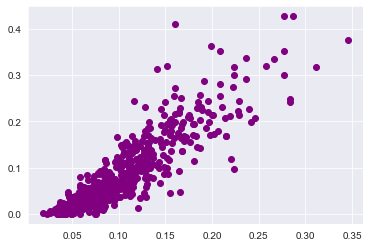

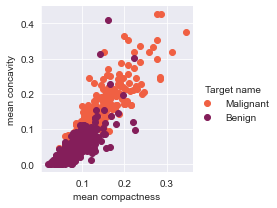

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(x=cancer_df['mean compactness'],y=cancer_df['mean concavity'], color='purple')
plt.show()

sns.set_style('darkgrid')
sns.FacetGrid(data_with_tumor,palette="rocket_r", hue = 'Target name') \
   .map(plt.scatter, 'mean compactness','mean concavity') \
   .add_legend()

plt.show()

### We can see that the mean concavity and the mean compactness of the breasts are low when there is no significant sign of breast cancer risk whereas in Malignant the same features are more by value.

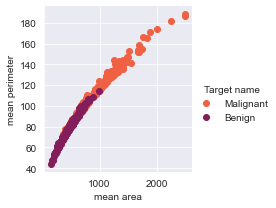

In [37]:

sns.set_style('darkgrid')
sns.FacetGrid(data_with_tumor,palette="rocket_r", hue = 'Target name') \
   .map(plt.scatter, 'mean area','mean perimeter') \
   .add_legend()

plt.show()

### We can see that mean area and perimeter are small for women who do not have much risk of breast cancer.

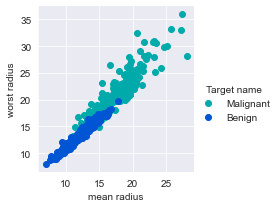

In [40]:

sns.set_style('darkgrid')
sns.FacetGrid(data_with_tumor,palette="winter_r", hue = 'Target name') \
   .map(plt.scatter, 'mean radius','worst radius') \
   .add_legend()

plt.show()

### We can see that the mean radius vs worst radius is more for women prone to breast cancer.

# Table for final algorithm selection upon metrics comparison

In [48]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

def models_evaluation(X, y, folds):
   
    # Perform cross-validation
    dtr = cross_validate(tree, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rf, X, y, cv=folds, scoring=scoring)
    kncsq = cross_validate(knn, X, y, cv=folds, scoring=scoring)

    # Create a data frame with the models performance metrics scores
    models_scores_table = pd.DataFrame({'Decision Tree':[dtr['test_accuracy'].mean(),
                                                               dtr['test_precision'].mean(),
                                                               dtr['test_recall'].mean(),
                                                               dtr['test_f1_score'].mean()],
                                       
                                      'Random Forest Classifier':[rfc['test_accuracy'].mean(),
                                                                   rfc['test_precision'].mean(),
                                                                   rfc['test_recall'].mean(),
                                                                   rfc['test_f1_score'].mean()],
                                       
                                      'K-Nearest Neighbors':[kncsq['test_accuracy'].mean(),
                                                       kncsq['test_precision'].mean(),
                                                       kncsq['test_recall'].mean(),
                                                       kncsq['test_f1_score'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)
  
# Run models_evaluation function with 5 cross folds
models_evaluation(cancer.data, cancer.target, 5)

Decision Tree  Random Forest Classifier  K-Nearest Neighbors  \
Accuracy        0.933256                  0.961372             0.927946   
Precision       0.941811                  0.961691             0.928521   
Recall          0.955282                  0.977543             0.960759   
F1 Score        0.947564                  0.969417             0.943823   

                         Best Score  
Accuracy   Random Forest Classifier  
Precision  Random Forest Classifier  
Recall     Random Forest Classifier  
F1 Score   Random Forest Classifier